
#	Create big database
#	AUTHOR: 乔昂 - jueta
#	DATE: 28/02/2023


In [2]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_feather("Data/map_23-01-19.feather")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2177 non-null   object 
 1   current         2177 non-null   object 
 2   flow_rate       2177 non-null   object 
 3   voltage         2177 non-null   object 
 4   current_PS      2177 non-null   object 
 5   temperature     0 non-null      float64
 6   humidity        0 non-null      float64
 7   date_and_time   2177 non-null   object 
 8   target_voltage  2177 non-null   int64  
 9   mean            2177 non-null   float64
 10  variance        2177 non-null   float64
 11  deviation       2177 non-null   float64
 12  median          2177 non-null   float64
 13  rms             2177 non-null   float64
 14  spray_mode      2177 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 255.2+ KB


,name,current,flow_rate,voltage,current_PS,temperature,humidity,date_and_time,target_voltage,mean,variance,deviation,median,rms,spray_mode
0,setup/liquid/ethanol,"[-0.7547169923782349, 0.0, 1.7610063552856445,...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.051814,12.968709,3.601209,0.000000,3.601582,Dripping
1,setup/liquid/ethanol,"[-5.03144645690918, 0.25157231092453003, -0.50...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.043250,12.921983,3.594716,0.000000,3.594976,Dripping
2,setup/liquid/ethanol,"[-0.5031446218490601, -0.25157231092453003, -1...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.033047,13.031668,3.609940,0.000000,3.610091,Dripping
3,setup/liquid/ethanol,"[4.276729583740234, -4.276729583740234, 5.7861...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.168287,13.022596,3.608683,0.251572,3.612606,Dripping
4,setup/liquid/ethanol,"[3.7735848426818848, -5.283019065856934, 0.251...",0.3,3101.31,-1.65806e-09,NaN,NaN,Thu_19 Jan 2023,3100,0.083547,13.095986,3.618838,0.000000,3.619802,Dripping


In [6]:
colormap = []
for electro_class in df['spray_mode']:
    if electro_class == 'Intermittent':
        colormap.append('blue')
    elif electro_class == 'Cone Jet':
        colormap.append('red')
    elif electro_class == 'Dripping':
        colormap.append('green')
    elif electro_class == 'Multi Jet':
        colormap.append('purple')
    elif electro_class == 'Corona':
        colormap.append('cyan')
    elif electro_class == 'Undefined':
        colormap.append('black')
    else:
        colormap.append('black')


df.insert(1, 'colormap', colormap)

In [25]:
df.loc[lambda df: df['flow_rate'].astype(float) == 0.3]


,name,colormap,current,flow_rate,voltage,current_PS,temperature,humidity,date_and_time,target_voltage,mean,variance,deviation,median,rms,spray_mode
0,setup/liquid/ethanol,green,"[-0.7547169923782349, 0.0, 1.7610063552856445,...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.051814,12.968709,3.601209,0.000000,3.601582,Dripping
1,setup/liquid/ethanol,green,"[-5.03144645690918, 0.25157231092453003, -0.50...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.043250,12.921983,3.594716,0.000000,3.594976,Dripping
2,setup/liquid/ethanol,green,"[-0.5031446218490601, -0.25157231092453003, -1...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.033047,13.031668,3.609940,0.000000,3.610091,Dripping
3,setup/liquid/ethanol,green,"[4.276729583740234, -4.276729583740234, 5.7861...",0.3,3001.54,-1.16064e-08,NaN,NaN,Thu_19 Jan 2023,3000,0.168287,13.022596,3.608683,0.251572,3.612606,Dripping
4,setup/liquid/ethanol,green,"[3.7735848426818848, -5.283019065856934, 0.251...",0.3,3101.31,-1.65806e-09,NaN,NaN,Thu_19 Jan 2023,3100,0.083547,13.095986,3.618838,0.000000,3.619802,Dripping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,setup/liquid/ethanol,green,"[2.7672955989837646, -2.7672955989837646, 6.28...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,0.127250,13.046904,3.612050,0.251572,3.614291,Dripping
142,setup/liquid/ethanol,green,"[2.0125784873962402, -3.522012710571289, 0.0, ...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,0.121011,13.270263,3.642837,0.251572,3.644846,Dripping
143,setup/liquid/ethanol,green,"[4.52830171585083, -0.25157231092453003, 1.509...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,0.129746,13.295930,3.646358,0.251572,3.648666,Dripping
144,setup/liquid/ethanol,green,"[-5.03144645690918, 5.283019065856934, 1.00628...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,0.164956,13.346557,3.653294,0.251572,3.657016,Dripping


In [26]:
df[120:146]

,name,colormap,current,flow_rate,voltage,current_PS,temperature,humidity,date_and_time,target_voltage,mean,variance,deviation,median,rms,spray_mode
120,setup/liquid/ethanol,black,"[45.03144836425781, 43.01886749267578, 47.5471...",0.3,6701.37,1.29167e-08,NaN,NaN,Thu_19 Jan 2023,6700,52.286236,458.221649,21.406113,49.811321,56.498428,
121,setup/liquid/ethanol,black,"[34.213836669921875, 34.46540832519531, 32.452...",0.3,6701.37,1.29167e-08,NaN,NaN,Thu_19 Jan 2023,6700,52.036274,562.492981,23.716934,48.050316,57.186249,
122,setup/liquid/ethanol,black,"[70.94338989257812, 65.40880584716797, 65.9119...",0.3,6801.16,3.70919e-08,NaN,NaN,Thu_19 Jan 2023,6800,56.583164,445.009827,21.095257,54.088047,60.387619,
123,setup/liquid/ethanol,black,"[49.81132125854492, 46.289310455322266, 49.811...",0.3,6801.16,3.70919e-08,NaN,NaN,Thu_19 Jan 2023,6800,57.196297,336.268158,18.337616,54.591194,60.063995,
124,setup/liquid/ethanol,black,"[34.213836669921875, 41.25786209106445, 37.735...",0.3,6801.16,3.70919e-08,NaN,NaN,Thu_19 Jan 2023,6800,60.045856,469.844330,21.675892,57.610065,63.838463,
125,setup/liquid/ethanol,black,"[50.062896728515625, 52.578617095947266, 54.33...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,58.448463,390.082001,19.750494,56.603775,61.695263,
126,setup/liquid/ethanol,red,"[48.805030822753906, 44.52830123901367, 45.031...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,61.716145,159.327499,12.622499,62.138363,62.993732,Cone Jet
127,setup/liquid/ethanol,blue,"[14.591195106506348, 15.345911026000977, 22.13...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,6.343250,35.954964,5.996246,5.786164,8.728790,Intermittent
128,setup/liquid/ethanol,black,"[-4.0251569747924805, -2.7672955989837646, -0....",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,-0.871713,13.395421,3.659976,-0.754717,3.762354,
129,setup/liquid/ethanol,black,"[0.5031446218490601, -6.5408806800842285, -0.2...",0.3,6901.25,2.73171e-08,NaN,NaN,Thu_19 Jan 2023,6900,-0.157358,14.143583,3.760796,-0.251572,3.764086,


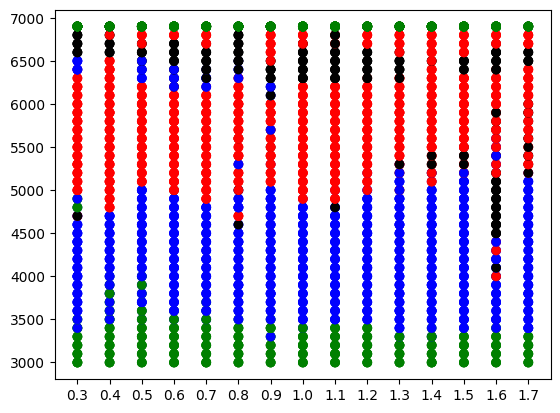

In [7]:
plt.scatter(df['flow_rate'], df['target_voltage'], color=df['colormap'])
plt.show()